# Reading the data from Sqlite


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sqlite3

In [4]:
con = sqlite3.connect(r'C:\Users\kushagramokati\Desktop\nit\Coding_pracitce\Data_science_practice\Zomato_Project/zomato_rawdata.sqlite')

In [6]:
df = pd.read_sql_query("SELECT * FROM Users",con)

# General Information of the DataSet

In [8]:
df.shape

(51717, 18)

In [11]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [13]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
copy_df = df.copy()

# Dealing with the Missing Values


In [16]:
copy_df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [59]:
copy_df.isnull().sum()/len(copy_df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.436549
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# Important Conclusion from the above operations 
     -->> As we notice that more than 50 % of data will be lost if we delete the nan values in dish_liked column
         We will keep that column for now..
        
     -->> let's check for rate column as it contains 15% of its points as null value which 
         is one of the most important feature.. 
         

In [20]:
copy_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

-->> 1... So, Now we found this column has 'NEW' ,"-" values which should replaced by zero or np.nan 
        after having conversation with my business team ( Domain Expertise)..

-->> 2...there are values as '3.8/5' instead of 3.8 , ie we have to fix this .. 

In [28]:
copy_df['rate'].replace(('NEW','-'),np.nan,inplace=True)

In [36]:
def converter(i):
    if(type(i) == str):
        return float(i.split('/')[0]) 
    else:
        return i

In [37]:
converter(' 3.4 /5')

3.4

In [41]:
type(converter('nan'))

float

In [55]:
copy_df['rate'] = copy_df['rate'].apply(converter)

In [57]:
copy_df.dtypes

index                            int64
url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [60]:
copy_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [70]:
trial = copy_df.set_index('rate')
# trial.groupby(trial['rate']).count()

In [71]:
trial

,index,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
rate,,,,,,,,,,,,,,,,,
4.1,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
4.1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3.8,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3.7,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
3.8,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.6,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,080 40301477,Whitefield,Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
NaN,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
NaN,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,None,Whitefield,Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield


In [73]:
t = copy_df.groupby(copy_df['rate']).count()

In [78]:
copy_df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Is there a relation between online order option and rating of the restaurant ?

In [80]:
count_df = pd.get_dummies(copy_df['online_order']).groupby(copy_df['rate']).sum()

In [83]:
count_df

,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

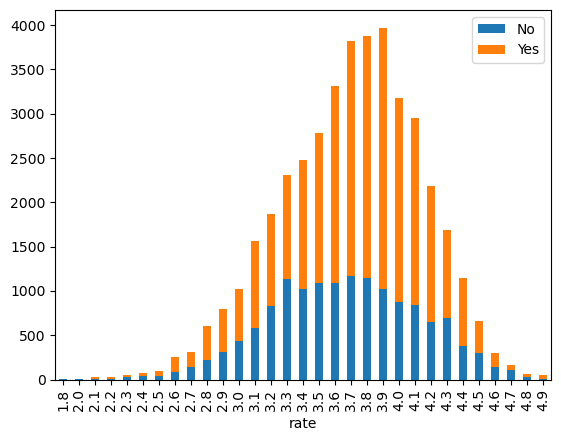

In [90]:
count_df.plot(kind = 'bar',stacked=True)

In [91]:
count_df.sum(axis=0)

No     14459
Yes    27206
dtype: int64

In [93]:
count_df.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [97]:
normalised_df = count_df.div(count_df.sum(axis=1).astype(float),axis=0)

<Axes: xlabel='rate'>

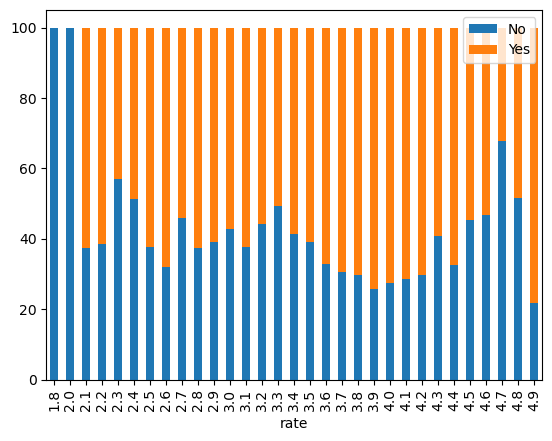

In [98]:
(normalised_df *100).plot(kind='bar',stacked=True)

# Inference :

For good rating ie > 4 , for most instances it seems that rest who accepts online order have received more number of ratings
than those rest. who don't accept online order

# Data Cleaning to perform Text Analysis
Perform Text Analysis.. ie analysing customer reviews of Quick Bites restaurant : 

ways to do it..
a) using wordcloud

    But wordcloud will not give a clear cut , how important words are
    So lets use a concept of frequency over here...
    
b) using plots/charts-- where each word have some frequency..

In [100]:
copy_df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [102]:
copy_df['rest_type'].isnull().sum()

227

In [104]:
data = copy_df.dropna(subset=['rest_type'])

In [105]:
data['rest_type'].isnull().sum()

0

In [106]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [107]:
data[data['rest_type'] == 'Quick Bites']

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
36,36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,None,"North Indian, Chinese, Fast Food",400,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari
39,39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,None,South Indian,150,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [114]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [116]:
quick_bites_df.shape

(20639, 18)

# Performing Data Pre-processing to pre-process this data..
    Steps-->>
        a) Perform Lower-case operation
        b) Do tokenization
        c) Removal of stopwords from data
        d) Store your entire data in the list so that we can commpute frequency of each word
        e) Do plotting , using Unigram  , bigram & Trigram analysis..

In [119]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x: x.lower())

C:\Users\kushagramokati\AppData\Local\Temp\ipykernel_14840\990775181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x: x.lower())


In [124]:
quick_bites_df['reviews_list'][3]

'[(\'rated 4.0\', "rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it\'s well managed............"), (\'rated 2.0\', \'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.\'), (\'rated 4.0\', \'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.\'), (\'rated 2.0\', \'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now com

In [120]:
from nltk.corpus import RegexpTokenizer

In [139]:
tokenizer =  RegexpTokenizer(pattern="[a-zA-Z]+")

In [197]:
print(tokenizer.tokenize(quick_bites_df['reviews_list'][3]))

['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [141]:
sample = data[0:10000]

In [142]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [143]:
reviews_tokens

0        [Rated, RATED, n, A, beautiful, place, to, din...
1        [Rated, RATED, n, Had, been, here, for, dinner...
2        [Rated, RATED, n, Ambience, is, not, that, goo...
3        [Rated, RATED, n, Great, food, and, proper, Ka...
4        [Rated, RATED, n, Very, good, restaurant, in, ...
                               ...                        
10046    [Rated, RATED, n, A, simplistic, joy, for, loc...
10047                              [Rated, RATED, n, Good]
10048    [Rated, RATED, n, Vry, gud, taste, and, someth...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

In [144]:
sample['reviews_list'][3]

'[(\'Rated 4.0\', "RATED\\n  Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it\'s well managed............"), (\'Rated 2.0\', \'RATED\\n  Reached the place at 3pm on Saturday. Half of the items on the menu were over. What was annoying was is the food was cold. The taste was also very average. Only dosa and holige were good. There were very few people in the restaurant and the service was still very slow. The waiters were all standing in one corner and talking. Had to call them repeatedly.\'), (\'Rated 4.0\', \'RATED\\n  Had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. One of the good hotel there for this price.\'), (\'Rated 2.0\', \'RATED\\n  How can a Udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.Why cant they clean it? The floor even had decorative colour paper every where and lot of food.Now com

In [145]:
reviews_tokens[3]

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [152]:
import nltk

In [153]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushagramokati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [155]:
stop = stopwords.words('English')

In [156]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [160]:
stop.extend(['Rated','n','nan','x','RATED','rated'])

In [161]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [162]:
rev3 = reviews_tokens[3]

In [164]:
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [187]:
print(trial(rev3))

None


# Store your entire data in the list so that we can compute frequency of each word

In [195]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review: [token for token in each_review if token not in stop] )

In [202]:
total_reviews_2D = list(reviews_tokens_clean)

In [204]:
total_reviews_1D = []
for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [205]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

In [207]:
from nltk import FreqDist 

In [208]:
fd = FreqDist() 

In [209]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [210]:
fd.most_common(5)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479)]

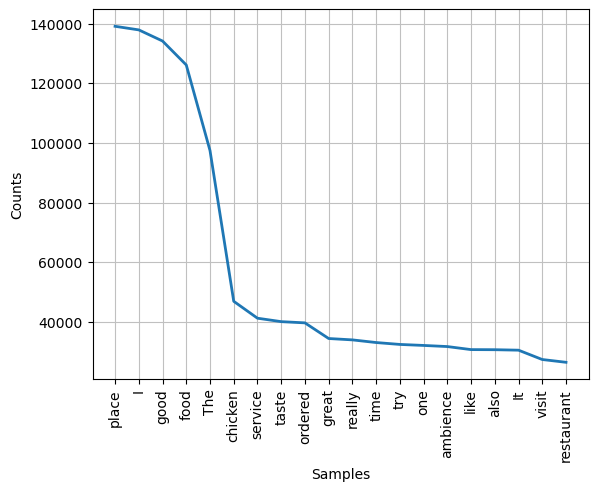

<Axes: xlabel='Samples', ylabel='Counts'>

In [211]:
fd.plot(20)

## Observations
Of the 20 most frequent words across customer reviews place, food , good , chicken ,taste ,service ,biryani
but it is not that much clear whether food is good or not, so we perform Bi-gram and Tri-gram analysis 

In [212]:
from nltk import FreqDist,bigrams,trigrams

In [213]:
bi_grams = bigrams(total_reviews_1D)

In [214]:
bi_grams

<generator object bigrams at 0x00000234074AB4C0>

In [217]:
fd_bigrams = FreqDist()
for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [218]:
fd_bigrams.most_common(10)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482)]

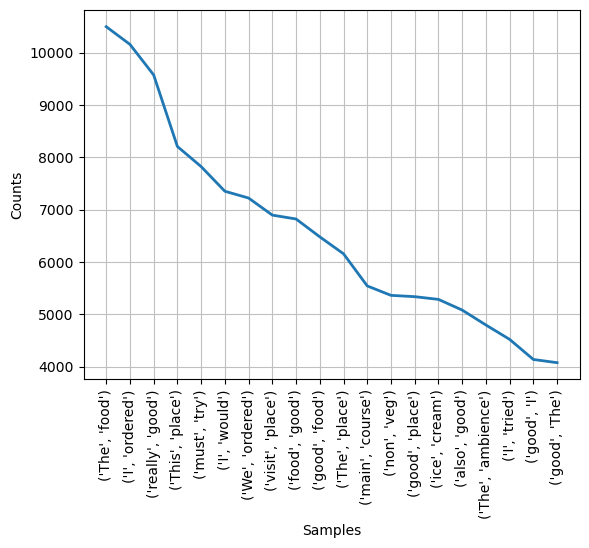

<Axes: xlabel='Samples', ylabel='Counts'>

In [219]:
fd_bigrams.plot(20)

# Observations
We have some new insights! Food items/preferences mentioned in the top 50 bigrams are 

Fried Rice , Ice cream , non-veg , chicken biryani , main course
Fried Rice


Factors contributing to restaurant experience are : 
good food > pocket friendly > good place > good place > value (for) money  > Home delivery..

There's a key insight here: the expense factor, which was missed by individual word frequency counts, 
was picked up by the bigram frequency counts.

In [220]:
tri_grams = trigrams(total_reviews_1D)

In [221]:
fd_trigrams = FreqDist()
for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [223]:
fd_trigrams.most_common(20)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582)]

# Observations
The specific food preferences we can see here are north Indian Food , paneer butter masala,
South Indian food & chicken fried rice...
ie , Bangalore is full of chicken lovers...

#  Extract geographical-coordinates from data ..

In [224]:
!pip install geocoder

     ---------------------------------------- 0.0/98.6 kB ? eta -:--:--
     ------------------------------------- -- 92.2/98.6 kB ? eta -:--:--
     ---------------------------------------- 98.6/98.6 kB 1.9 MB/s eta 0:00:00


In [225]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 970.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------  122.9/125.4 kB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 2.5 MB/s eta 0:00:00


In [227]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [255]:
copy_df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [257]:
copy_df['location'] = copy_df['location']+ " , Bangalore, Karnataka, India"

In [258]:
copy_df['location']

0               Banashankari , Bangalore, Karnataka, India
1               Banashankari , Bangalore, Karnataka, India
2               Banashankari , Bangalore, Karnataka, India
3               Banashankari , Bangalore, Karnataka, India
4               Basavanagudi , Bangalore, Karnataka, India
                               ...                        
51712             Whitefield , Bangalore, Karnataka, India
51713             Whitefield , Bangalore, Karnataka, India
51714             Whitefield , Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield , Bangalore, Karnat...
51716    ITPL Main Road, Whitefield , Bangalore, Karnat...
Name: location, Length: 51717, dtype: object

In [ ]:
copy_df_2 = copy_df.copy()

Creating a duplicate for backup

In [261]:
# copy_df_2 .head()

In [262]:
copy_df.dropna(subset=['location'],inplace=True)

In [263]:
copy_df['location'].isnull().sum()

0

In [266]:
location_df = pd.DataFrame(copy_df['location'].unique())

In [268]:
location_df.columns = ['name']

In [269]:
location_df 

,name
0,"Banashankari , Bangalore, Karnataka, India"
1,"Basavanagudi , Bangalore, Karnataka, India"
2,"Mysore Road , Bangalore, Karnataka, India"
3,"Jayanagar , Bangalore, Karnataka, India"
4,"Kumaraswamy Layout , Bangalore, Karnataka, India"
...,...
88,"West Bangalore , Bangalore, Karnataka, India"
89,"Magadi Road , Bangalore, Karnataka, India"
90,"Yelahanka , Bangalore, Karnataka, India"
91,"Sahakara Nagar , Bangalore, Karnataka, India"


In [270]:
from geopy.geocoders import Nominatim

In [271]:
geolocator = Nominatim(user_agent="app", timeout = None)

In [274]:
lat = []
lon = []
for item in location_df['name']:
    item = geolocator.geocode(item)
    if item is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(item.latitude)
        lon.append(item.longitude)

In [275]:
location_df['latitude'] = lat
location_df['longitude'] = lon

In [276]:
location_df

,name,latitude,longitude
0,"Banashankari , Bangalore, Karnataka, India",12.915219,77.573621
1,"Basavanagudi , Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road , Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar , Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore, Karnataka, India",12.908149,77.555318
...,...,...,...
88,"West Bangalore , Bangalore, Karnataka, India",13.022235,77.567183
89,"Magadi Road , Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka , Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore, Karnataka, India",13.062147,77.580061


In [282]:
location_df[location_df['latitude'].isnull()]

,name,latitude,longitude
79,"Rammurthy Nagar , Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar , Bangalore, Karnataka, India",NaN,NaN


In [280]:
location_df.iloc[45]

name         St. Marks Road , Bangalore, Karnataka, India
latitude                                        12.974426
longitude                                        77.60153
Name: 45, dtype: object

In [ ]:
13.0120218   77.6777817

In [286]:
location_df.iloc[79] = ('Rammurthy Nagar , Bangalore, Karnataka, India','13.0120218','77.6777817')

In [287]:
location_df.iloc[79]

name         Rammurthy Nagar , Bangalore, Karnataka, India
latitude                                        13.0120218
longitude                                       77.6777817
Name: 79, dtype: object

In [ ]:
13.010316  77.580569

In [289]:
location_df.iloc[85] = ('Sadashiv Nagar , Bangalore, Karnataka, India','13.010316','77.580569')

In [290]:
location_df.iloc[85] 

name         Sadashiv Nagar , Bangalore, Karnataka, India
latitude                                        13.010316
longitude                                       77.580569
Name: 85, dtype: object

In [291]:
location_df[location_df['latitude'].isnull()]

,name,latitude,longitude


In [294]:
copy_df['cuisines'].str.contains('North Indian')

0         True
1         True
2        False
3         True
4         True
         ...  
51712    False
51713    False
51714    False
51715    False
51716     True
Name: cuisines, Length: 51696, dtype: object

In [323]:
copy_df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [296]:
 copy_df['cuisines'].isnull().sum()

24

In [298]:
 copy_df = copy_df.dropna(subset=['cuisines'])

In [301]:
north_india = copy_df[copy_df['cuisines'].str.contains('North Indian')]

In [303]:
north_india.shape

(21085, 18)

In [307]:
north_india_rest_count=north_india['location'].value_counts().reset_index().rename(columns={'location':'name'})

In [308]:
north_india_rest_count

,name,count
0,"BTM , Bangalore, Karnataka, India",2469
1,"HSR , Bangalore, Karnataka, India",1123
2,"Whitefield , Bangalore, Karnataka, India",1059
3,"Marathahalli , Bangalore, Karnataka, India",1038
4,"JP Nagar , Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal , Bangalore, Karnataka, India",4
86,"Jakkur , Bangalore, Karnataka, India",3
87,"Central Bangalore , Bangalore, Karnataka, India",2
88,"West Bangalore , Bangalore, Karnataka, India",1


In [310]:
heatmap_df=north_india_rest_count.merge(location_df,on='name',how='inner')

# Building Geographical Heat-Maps

In [313]:
# import folium
! pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/97.0 kB ? eta -:--:--
   ------------------------------------- -- 92.2/97.0 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 97.0/97.0 kB 1.4 MB/s eta 0:00:00


In [315]:
import folium

In [316]:
basemap = folium.Map()

In [317]:
basemap

In [319]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [318]:
from folium.plugins import HeatMap

In [320]:
HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)

In [321]:
basemap

# conclusions(Inferences)
1.It is clear that restaurants tend to concentrate in central bangalore area.

2.The clutter of restaurants lowers are we move away from central.

3.So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.


# Performing Automation 

In [325]:
def get_heat_map(cuisine):
    cuisine_india = copy_df[copy_df['cuisines'].str.contains(cuisine)]
    cuisine_india_rest_count=cuisine_india['location'].value_counts().reset_index().rename(columns={'location':'name'})
    heatmap_df = cuisine_india_rest_count.merge(location_df,on='name',how='inner')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude','count']]).add_to(basemap)
    return basemap

In [328]:
get_heat_map('Thai')

                                                name  count   latitude  \
0  Koramangala 5th Block , Bangalore, Karnataka, ...    125  12.934843   
1              MG Road , Bangalore, Karnataka, India     71  12.975526   
2          Indiranagar , Bangalore, Karnataka, India     62  12.973291   
3      Cunningham Road , Bangalore, Karnataka, India     55   12.98445   

   longitude  
0  77.618977  
1   77.60679  
2  77.640467  
3  77.597113  
